<a href="https://colab.research.google.com/github/rahul-m-patel/house_price_predictor/blob/main/House_price_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
from google.colab import drive

drive.mount('/content/drive')
%cd drive/MyDrive/bangalore_house_price_prediction/
!ls


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[Errno 2] No such file or directory: 'drive/MyDrive/bangalore_house_price_prediction/'
/content/drive/MyDrive/bangalore_house_price_prediction
Bengaluru_House_Data.csv


In [57]:
import pandas as pd
import io

df = pd.read_csv('Bengaluru_House_Data.csv')
df


,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [58]:
df.drop(['area_type','availability','society'],axis=1,inplace=True)
df

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,0.0,231.00
13316,Richards Town,4 BHK,3600,5.0,NaN,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,1.0,488.00


In [59]:
df.isnull().sum()

location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [60]:
import numpy as np
df.balcony.replace(np.nan,0,inplace=True)
df.balcony.isnull().sum()

0

In [61]:
df.dropna(inplace=True)
df.shape

(13246, 6)

In [62]:
df['bedrooms'] = df['size'].apply(lambda x: str(x).split(' ')[0])
df.drop('size',axis=1,inplace=True)
df

,location,total_sqft,bath,balcony,price,bedrooms
0,Electronic City Phase II,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,2600,5.0,3.0,120.00,4
2,Uttarahalli,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,1521,3.0,1.0,95.00,3
4,Kothanur,1200,2.0,1.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,3453,4.0,0.0,231.00,5
13316,Richards Town,3600,5.0,0.0,400.00,4
13317,Raja Rajeshwari Nagar,1141,2.0,1.0,60.00,2
13318,Padmanabhanagar,4689,4.0,1.0,488.00,4


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13246 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13246 non-null  object 
 1   total_sqft  13246 non-null  object 
 2   bath        13246 non-null  float64
 3   balcony     13246 non-null  float64
 4   price       13246 non-null  float64
 5   bedrooms    13246 non-null  object 
dtypes: float64(3), object(3)
memory usage: 724.4+ KB


In [64]:
df['bedrooms'] = df.bedrooms.apply(lambda x: float(x))
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13246 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13246 non-null  object 
 1   total_sqft  13246 non-null  object 
 2   bath        13246 non-null  float64
 3   balcony     13246 non-null  float64
 4   price       13246 non-null  float64
 5   bedrooms    13246 non-null  float64
dtypes: float64(4), object(2)
memory usage: 724.4+ KB


In [65]:
def convert_to_float(total_sqft):
  splits = total_sqft.split('-')
  if len(splits)>=2:
    return (float(splits[0]) + float(splits[1]))/2;
  else:
    try:
      return float(splits[0])
    except:
      return None

df['total_sqft']=df.total_sqft.apply(lambda x: convert_to_float(x))

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13246 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13246 non-null  object 
 1   total_sqft  13200 non-null  float64
 2   bath        13246 non-null  float64
 3   balcony     13246 non-null  float64
 4   price       13246 non-null  float64
 5   bedrooms    13246 non-null  float64
dtypes: float64(5), object(1)
memory usage: 724.4+ KB


In [67]:
df.describe()

,total_sqft,bath,balcony,price,bedrooms
count,13200.000000,13246.000000,13246.000000,13246.000000,13246.000000
mean,1555.302783,2.692586,1.520233,112.389392,2.801902
std,1237.323445,1.341506,0.859301,149.076587,1.295758
min,1.000000,1.000000,0.000000,8.000000,1.000000
25%,1100.000000,2.000000,1.000000,50.000000,2.000000
50%,1275.000000,2.000000,2.000000,72.000000,3.000000
75%,1672.000000,3.000000,2.000000,120.000000,3.000000
max,52272.000000,40.000000,3.000000,3600.000000,43.000000


In [68]:
df.isnull().sum()

location       0
total_sqft    46
bath           0
balcony        0
price          0
bedrooms       0
dtype: int64

In [69]:
df.dropna(inplace=True)
df.isnull().sum()

location      0
total_sqft    0
bath          0
balcony       0
price         0
bedrooms      0
dtype: int64

In [70]:
df.location = df.location.apply(lambda x: x.strip())
loc_stats = df.groupby('location')['location'].agg('count').sort_values(ascending=False)
loc_less_than_10 = loc_stats[loc_stats<=10]
df.location = df.location.apply(lambda x: 'other' if x in loc_less_than_10 else x) #locations which had less than 10 samples are replaced by 'other' to reduce dimensionality while training model
df

,location,total_sqft,bath,balcony,price,bedrooms
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2.0
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4.0
2,Uttarahalli,1440.0,2.0,3.0,62.00,3.0
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3.0
4,Kothanur,1200.0,2.0,1.0,51.00,2.0
...,...,...,...,...,...,...
13315,Whitefield,3453.0,4.0,0.0,231.00,5.0
13316,other,3600.0,5.0,0.0,400.00,4.0
13317,Raja Rajeshwari Nagar,1141.0,2.0,1.0,60.00,2.0
13318,Padmanabhanagar,4689.0,4.0,1.0,488.00,4.0


In [71]:
df.drop(df[df.total_sqft/df.bedrooms<=100].index,axis=0,inplace=True)#dropping samples where square footage per bedroom seems unusual
df.drop(df[df.bath>df.bedrooms+2].index,axis=0,inplace=True)#dropping samples with insane difference in number of baths and bedroom

In [72]:
df['price_per_sqft']=df['price']*100000/df['total_sqft']
df

,location,total_sqft,bath,balcony,price,bedrooms,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2.0,3699.810606
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4.0,4615.384615
2,Uttarahalli,1440.0,2.0,3.0,62.00,3.0,4305.555556
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3.0,6245.890861
4,Kothanur,1200.0,2.0,1.0,51.00,2.0,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,3453.0,4.0,0.0,231.00,5.0,6689.834926
13316,other,3600.0,5.0,0.0,400.00,4.0,11111.111111
13317,Raja Rajeshwari Nagar,1141.0,2.0,1.0,60.00,2.0,5258.545136
13318,Padmanabhanagar,4689.0,4.0,1.0,488.00,4.0,10407.336319


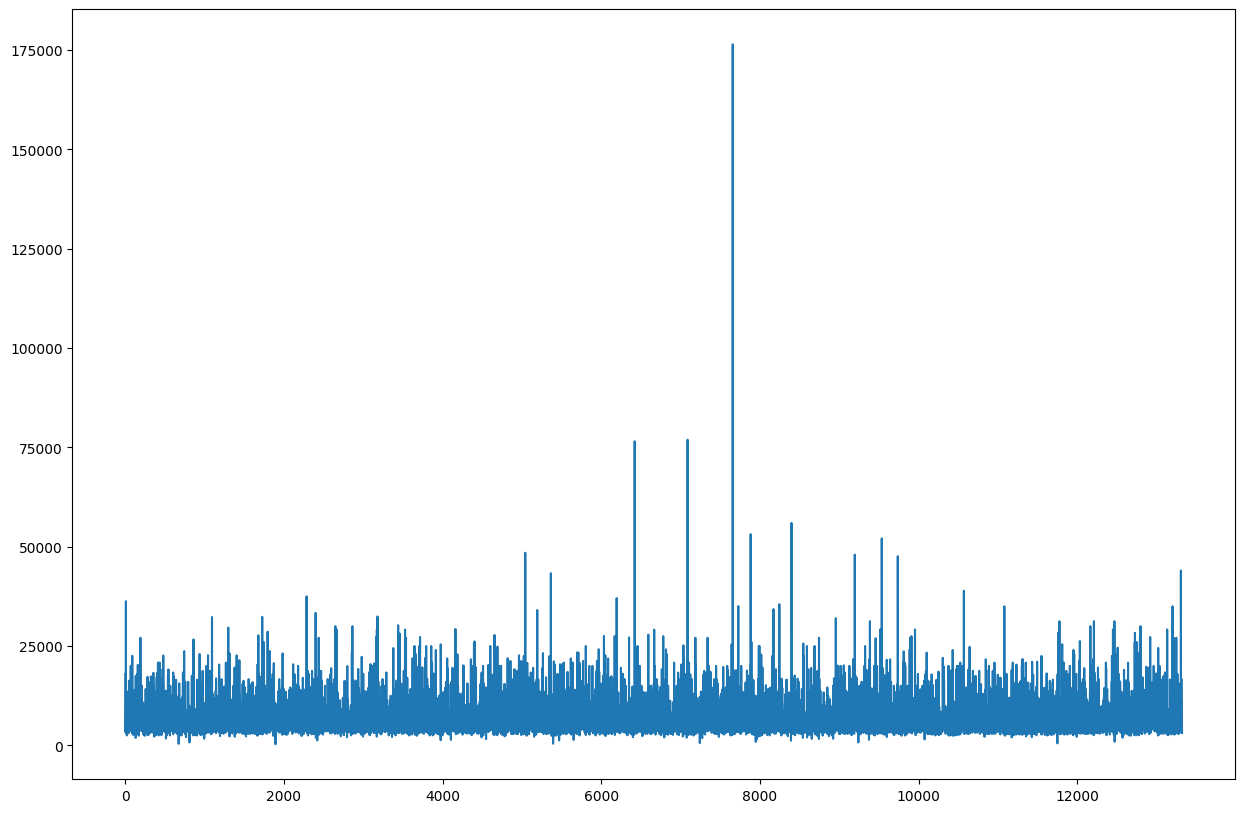

In [73]:
import matplotlib.pyplot as plt
plt.plot(df.price_per_sqft)
plt.show()

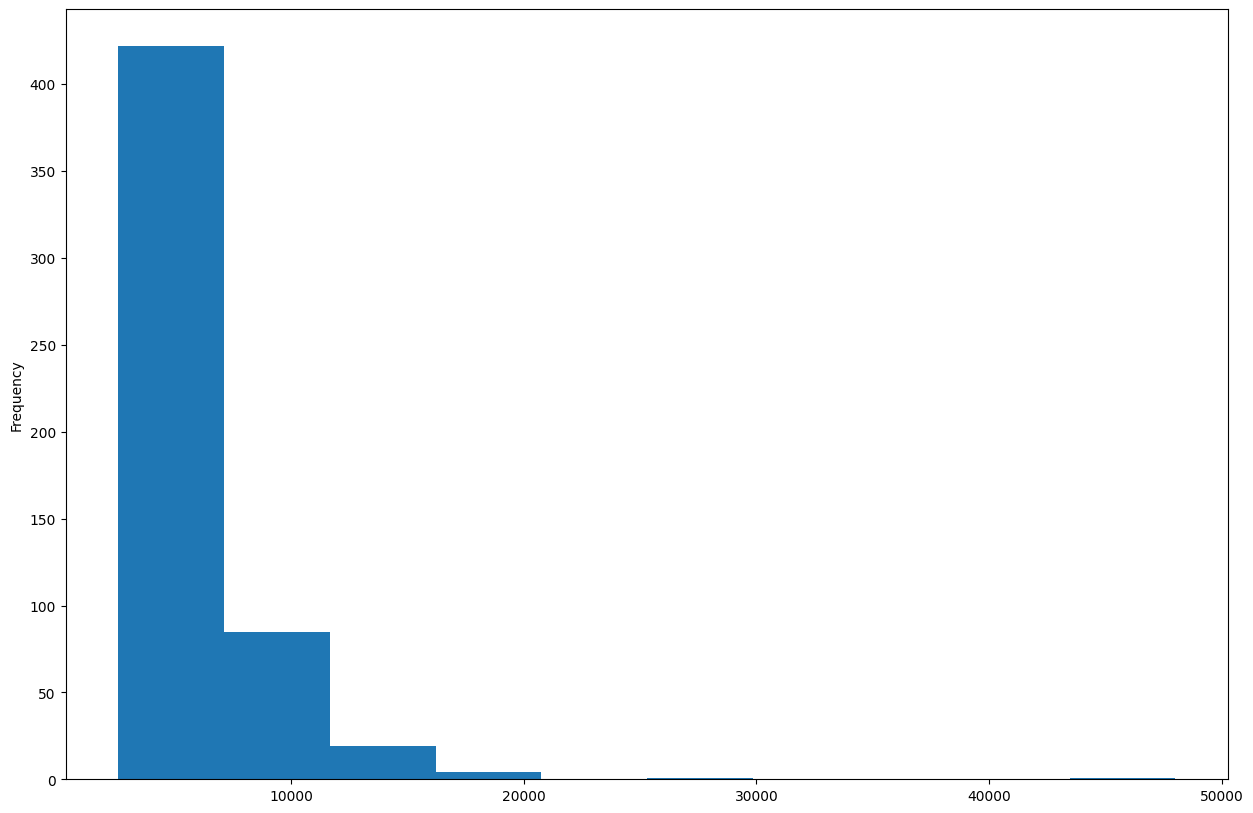

In [74]:
grouped_df = df.groupby('location')
for key, item in grouped_df:
    if key=='Whitefield':
      loc_df = grouped_df.get_group(key)
      loc_df.price_per_sqft.plot.hist()


In [75]:

for key, item in grouped_df:
    loc_df = grouped_df.get_group(key)
    mean = loc_df.price_per_sqft.mean()
    std = loc_df.price_per_sqft.std()
    df.loc[df['location']==key,'mean'] = mean
    df.loc[df['location']==key,'std'] = std


df

,location,total_sqft,bath,balcony,price,bedrooms,price_per_sqft,mean,std
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2.0,3699.810606,3882.655658,2126.571198
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4.0,4615.384615,4468.307828,931.340254
2,Uttarahalli,1440.0,2.0,3.0,62.00,3.0,4305.555556,4647.732179,2711.986316
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3.0,6245.890861,6613.525331,714.882318
4,Kothanur,1200.0,2.0,1.0,51.00,2.0,4250.000000,5699.354917,2006.376594
...,...,...,...,...,...,...,...,...,...
13315,Whitefield,3453.0,4.0,0.0,231.00,5.0,6689.834926,6202.283429,3230.607483
13316,other,3600.0,5.0,0.0,400.00,4.0,11111.111111,7973.452326,6396.086579
13317,Raja Rajeshwari Nagar,1141.0,2.0,1.0,60.00,2.0,5258.545136,4584.515438,2358.247048
13318,Padmanabhanagar,4689.0,4.0,1.0,488.00,4.0,10407.336319,7250.094181,2804.354656


In [76]:
# df[df.price_per_sqft<=df['mean']-2*df['std']].index
df.drop(df[df.price_per_sqft<=df['mean']-df['std']].index,axis=0,inplace=True)
df.drop(df[df.price_per_sqft>=df['mean']+df['std']].index,axis=0,inplace=True)


In [77]:
df.drop(['mean','std'],axis=1,inplace=True)
df

,location,total_sqft,bath,balcony,price,bedrooms,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2.0,3699.810606
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4.0,4615.384615
2,Uttarahalli,1440.0,2.0,3.0,62.00,3.0,4305.555556
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3.0,6245.890861
4,Kothanur,1200.0,2.0,1.0,51.00,2.0,4250.000000
...,...,...,...,...,...,...,...
13314,Green Glen Layout,1715.0,3.0,3.0,112.00,3.0,6530.612245
13315,Whitefield,3453.0,4.0,0.0,231.00,5.0,6689.834926
13316,other,3600.0,5.0,0.0,400.00,4.0,11111.111111
13317,Raja Rajeshwari Nagar,1141.0,2.0,1.0,60.00,2.0,5258.545136


In [78]:
df.describe()

,total_sqft,bath,balcony,price,bedrooms,price_per_sqft
count,10943.000000,10943.000000,10943.000000,10943.000000,10943.000000,10943.000000
mean,1490.703171,2.536690,1.536325,92.358602,2.648817,5843.740559
std,863.583174,1.100631,0.835890,86.587740,1.048687,2525.503650
min,276.000000,1.000000,0.000000,8.000000,1.000000,1600.000000
25%,1100.000000,2.000000,1.000000,49.065000,2.000000,4262.295082
50%,1273.000000,2.000000,2.000000,68.000000,2.000000,5239.852399
75%,1642.500000,3.000000,2.000000,101.000000,3.000000,6629.670691
max,30400.000000,27.000000,3.000000,2200.000000,27.000000,27083.333333


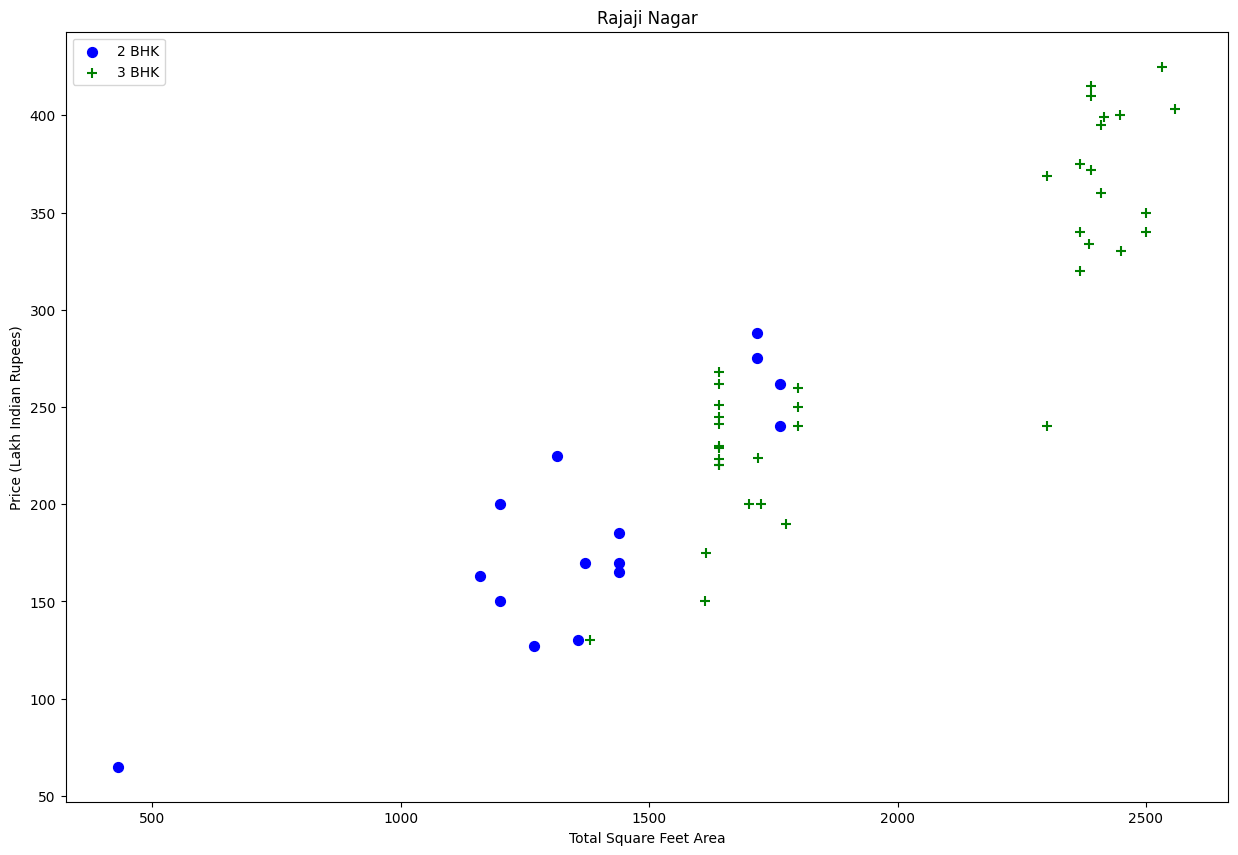

In [79]:
import matplotlib
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bedrooms==2)]
    bhk3 = df[(df.location==location) & (df.bedrooms==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()

plot_scatter_chart(df,"Rajaji Nagar")

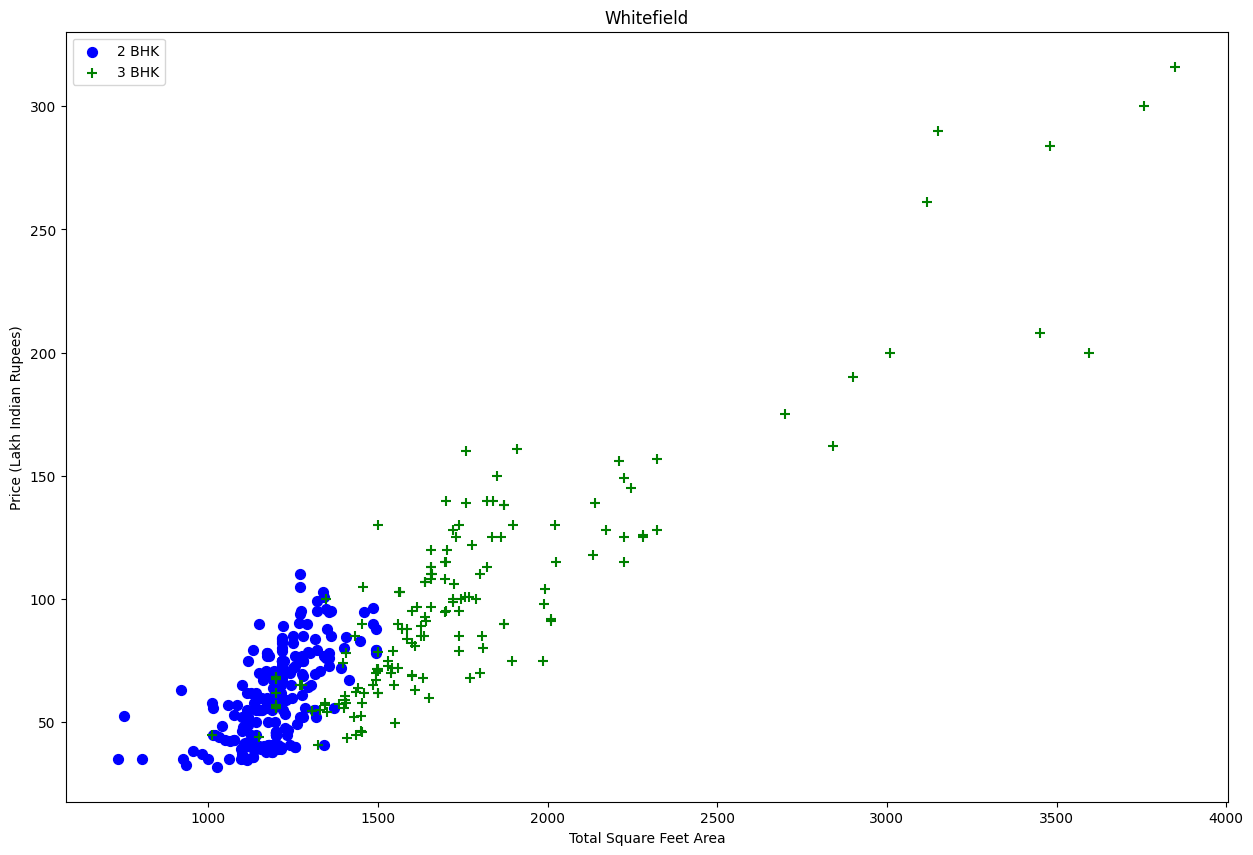

In [80]:
plot_scatter_chart(df,"Whitefield")

In [81]:
#Since there are some points where total_square_footage of 2bhk > 3bhk, lets try removing samples where square_footage of larger house is lesser than avg. total_square_footage of smaller house
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bedrooms'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bedrooms'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df = remove_bhk_outliers(df)

df.shape

(7815, 7)

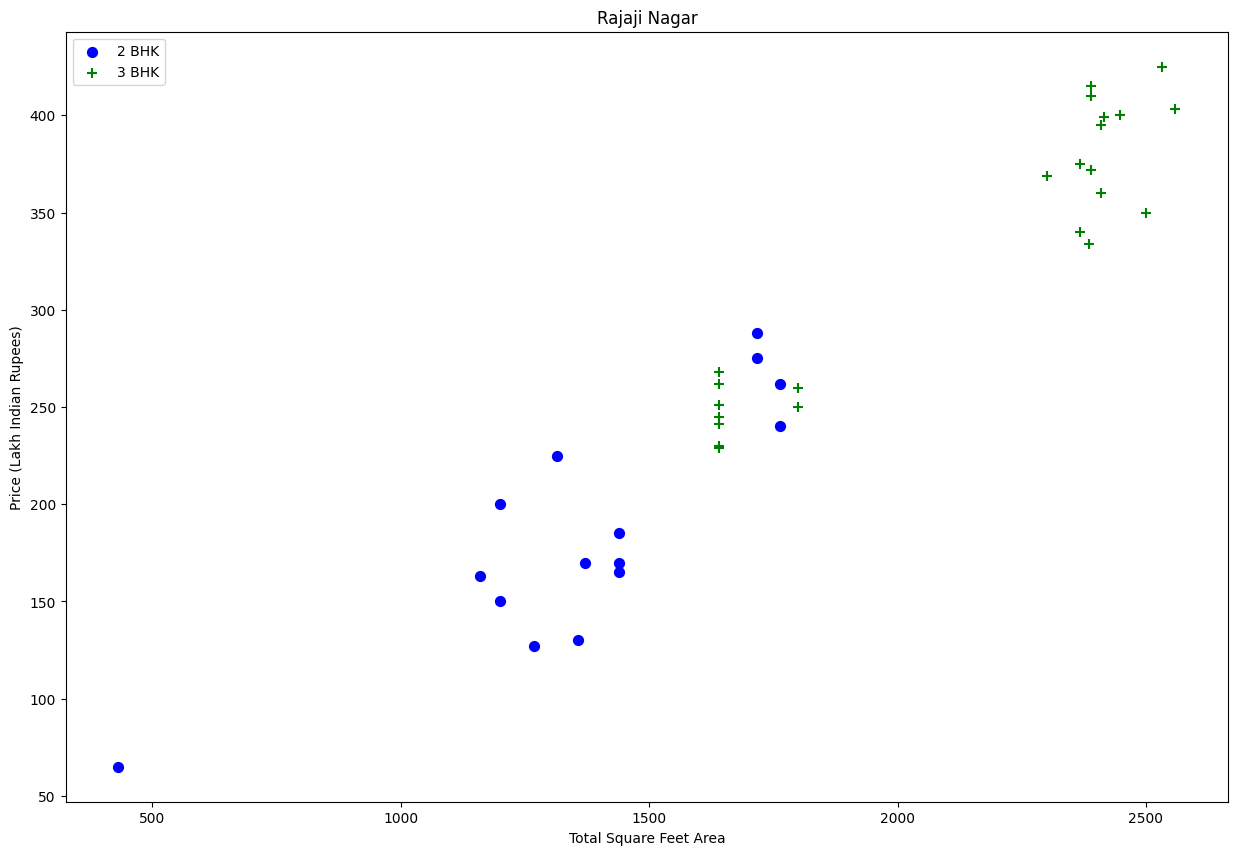

In [82]:
plot_scatter_chart(df,"Rajaji Nagar")

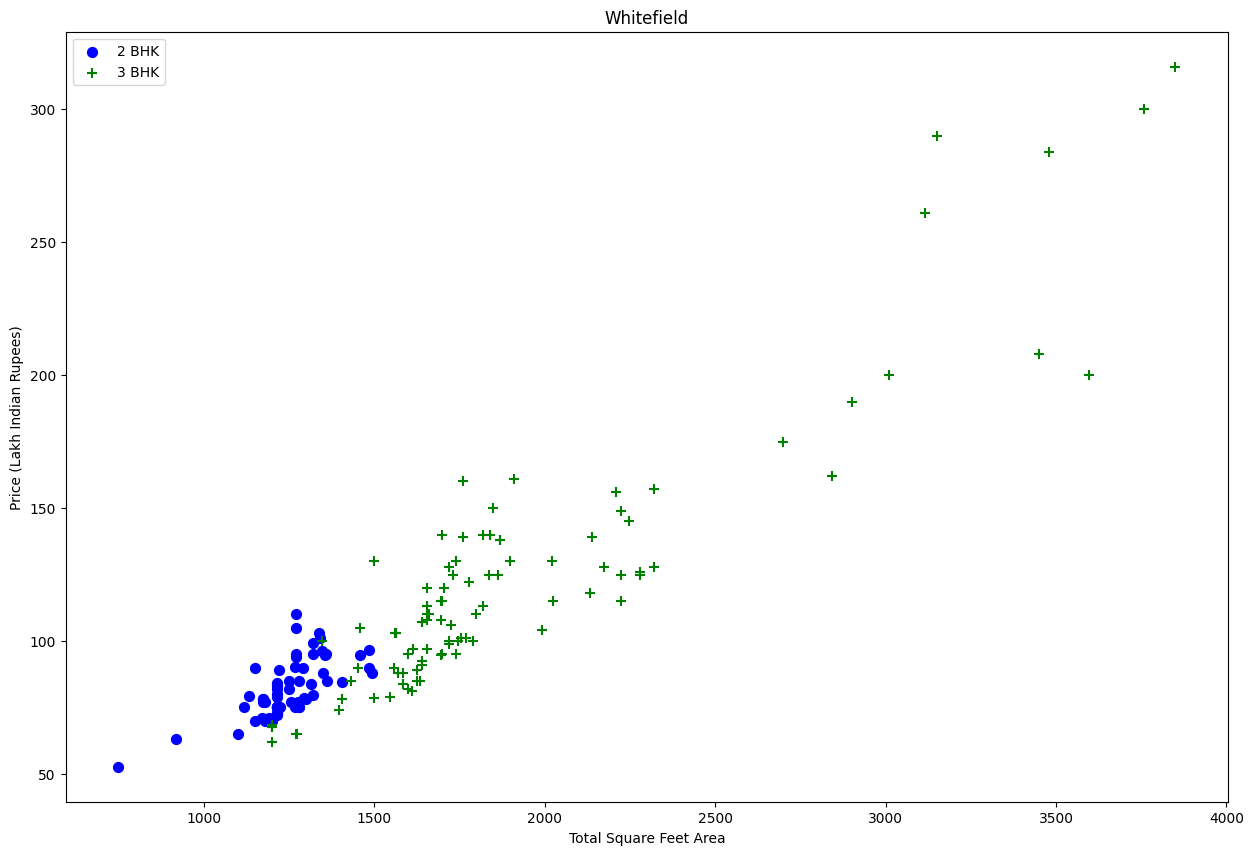

In [83]:
plot_scatter_chart(df,"Whitefield")

In [84]:
dummies = pd.get_dummies(df.location)
dummies

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13313,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13314,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13316,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
13317,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [85]:
df2 = pd.concat([df,dummies.drop('other',axis=1)],axis=1)
df2

,location,total_sqft,bath,balcony,price,bedrooms,price_per_sqft,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2.0,3699.810606,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4.0,4615.384615,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Uttarahalli,1440.0,2.0,3.0,62.00,3.0,4305.555556,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3.0,6245.890861,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Kothanur,1200.0,2.0,1.0,51.00,2.0,4250.000000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13313,Uttarahalli,1345.0,2.0,1.0,57.00,3.0,4237.918216,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13314,Green Glen Layout,1715.0,3.0,3.0,112.00,3.0,6530.612245,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13316,other,3600.0,5.0,0.0,400.00,4.0,11111.111111,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13317,Raja Rajeshwari Nagar,1141.0,2.0,1.0,60.00,2.0,5258.545136,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [86]:
df2.drop(['location','price_per_sqft'],axis=1,inplace=True)
df2.head()

,total_sqft,bath,balcony,price,bedrooms,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1056.0,2.0,1.0,39.07,2.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2600.0,5.0,3.0,120.00,4.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1440.0,2.0,3.0,62.00,3.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1521.0,3.0,1.0,95.00,3.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1200.0,2.0,1.0,51.00,2.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [87]:
#build model
X = df2.drop(['price'],axis=1)
X.head()

,total_sqft,bath,balcony,bedrooms,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1056.0,2.0,1.0,2.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2600.0,5.0,3.0,4.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1440.0,2.0,3.0,3.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1521.0,3.0,1.0,3.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1200.0,2.0,1.0,2.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [88]:
Y = df2.price
Y.head()

0     39.07
1    120.00
2     62.00
3     95.00
4     51.00
Name: price, dtype: float64

In [89]:
X.shape

(7815, 244)

In [90]:
len(Y)

7815

In [91]:
X.isnull().sum()

total_sqft             0
bath                   0
balcony                0
bedrooms               0
1st Block Jayanagar    0
                      ..
Yelachenahalli         0
Yelahanka              0
Yelahanka New Town     0
Yelenahalli            0
Yeshwanthpur           0
Length: 244, dtype: int64

In [ ]:

#using GridSearchCV to decide which model works the best
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost as xg


def find_best_model(X,Y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {

            }
        },
        'knnRegressor': {
            'model': KNeighborsRegressor(),
            'params': {
                'n_neighbors': [15,25,35]
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['squared_error','absolute_error'],
                'splitter': ['best','random']
            }
        },
        'XGRB' : {
            'model' : xg.XGBRegressor(),
            'params' : {
                'n_estimators' : [400, 500, 600]
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0) #5 fold cross validation, 80:20 train:test
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,Y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model(X,Y)

In [93]:

X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=10)


In [94]:
X_train

,total_sqft,bath,balcony,bedrooms,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
3272,1058.0,2.0,2.0,2.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8599,1250.0,2.0,2.0,2.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11063,1101.0,2.0,1.0,2.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13280,1425.0,3.0,2.0,3.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3514,3530.0,4.0,2.0,4.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5879,1665.0,3.0,2.0,3.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2306,3122.0,6.0,2.0,4.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7923,1100.0,2.0,2.0,2.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12454,1236.0,2.0,1.0,2.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [95]:
xgboost = xg.XGBRegressor()
xgboost.fit(X_train,y_train)
xgboost.score(X_test,y_test)

0.8551325198384669

In [115]:
def predict_price(location,sqft,bath,bedrooms,balcony):
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = balcony
    x[3] = bedrooms
    if loc_index >= 0:
        x[loc_index] = 1
    df = pd.DataFrame([x], columns = X.columns)

    return xgboost.predict(df)[0]

In [117]:
predict_price('1st Phase JP Nagar',1000, 2, 2, 0)

61.833027

In [118]:
predict_price('1st Phase JP Nagar',1000, 3, 3, 0)

98.380295

In [121]:
predict_price('1st Phase JP Nagar',1000, 2, 2, 1)

60.750927

In [119]:
predict_price('Indira Nagar',1000, 2, 2, 0)

95.533676

In [120]:
predict_price('Indira Nagar',1000, 3, 3, 1)

160.42368

In [ ]:
import pickle
with open('home_prices_model.pickle','wb') as f:
    pickle.dump(xgboost,f)

In [ ]:
import json
columns = {
    'data_columns' : [column.lower() for column in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))